Training metrics:
MSE: 0.34
RMSE: 0.59
MAPE: 24193396999609.00%
R2: 0.75

Test metrics:
MSE: 1.83
RMSE: 1.35
MAPE: 12819173070896.55%
R2: -0.33


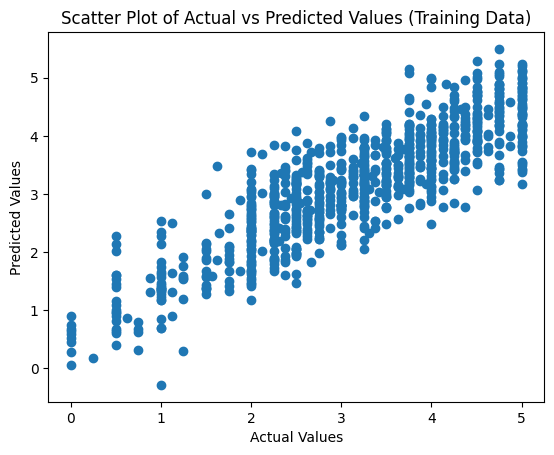

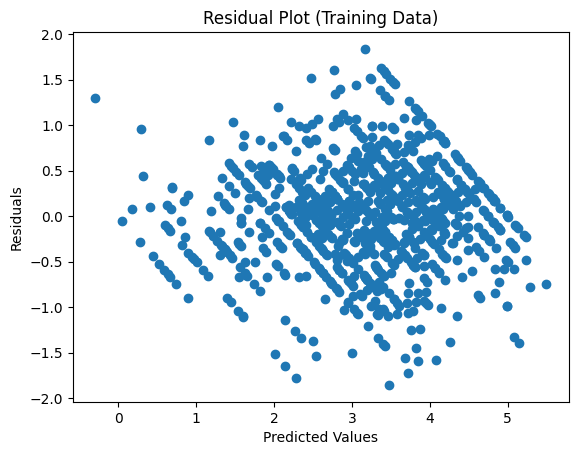

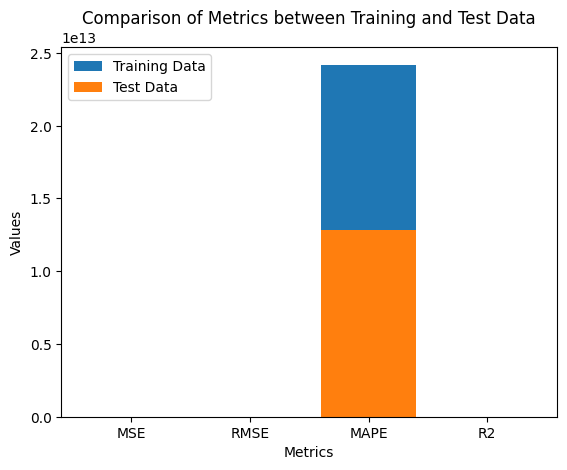

In [11]:
# A3 Repeat the exercises A1 and A2 with more than one attribute or all attributes.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_excel('/content/TRAINING_DATA.xlsx')

# Defining the feature and target variables
X = df.drop(columns=['OUTPUT'])  # keep all attributes except TargetVariable

y = df['OUTPUT']  # target variable

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and train a multiple linear regression model
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# Making predictions on the training data
y_train_pred = reg.predict(X_train_scaled)

# Calculating metrics for the training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Training metrics:")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAPE: {mape_train:.2f}%")
print(f"R2: {r2_train:.2f}")

# Making predictions on the test data
y_test_pred = reg.predict(X_test_scaled)

# Calculating metrics for the test data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest metrics:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAPE: {mape_test:.2f}%")
print(f"R2: {r2_test:.2f}")

# Ploting the scatter plot of actual vs predicted values for training data
import matplotlib.pyplot as plt
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values (Training Data)')
plt.show()

# Ploting the residual plot for training data
plt.scatter(y_train_pred, y_train - y_train_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Data)')
plt.show()

# Ploting the bar chart to compare metrics between training and test sets
metrics = ['MSE', 'RMSE', 'MAPE', 'R2']
train_metrics = [mse_train, rmse_train, mape_train, r2_train]
test_metrics = [mse_test, rmse_test, mape_test, r2_test]

x = range(len(metrics))
plt.bar(x, train_metrics, label='Training Data')
plt.bar(x, test_metrics, label='Test Data')
plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics between Training and Test Data')
plt.legend()
plt.show()